In [1]:
import jax.numpy as jnp
from jax.lax import fori_loop
from jax.lax import scan
from jax import grad 
from jax import jit
import tqdm

In [16]:
import jax
jax.__version__

'0.2.6'

### using fori_loop

In [12]:
def f_lp(i,x):
    x=1.0/(1.0+x)
    return x

In [13]:
def g_lp(x):
    return fori_loop(0,2,f_lp,x)

In [5]:
h_lp=grad(g_lp)

In [19]:
try:
    h(1.0)
except:
    print("Error. fori_loop cannot use autodiff for verion "+jax.__version__)

Error. fori_loop cannot use autodiff for verion 0.2.6


In [20]:
@jit
def f(x,step):
    x=1.0/(1.0+x)
    return x,step

In [21]:
@jit
def g(x0):
    step=jnp.arange(0,3)
    x,step=scan(f,x0,step)
    return x

In [22]:
h=grad(g)

In [23]:
xarr=jnp.linspace(0,3,100)

In [25]:
harr=[]
for xc in tqdm.tqdm(xarr):
    harr.append(h(xc))
harr=jnp.array(harr)

100%|██████████| 100/100 [00:00<00:00, 179.08it/s]


In [26]:
#checking with sympy
import sympy as sp
a = sp.Symbol('a')

In [27]:
def f_sp(a):
    return 1/(1+a)

In [28]:
sp.diff(f_sp(f_sp(f_sp(a))),a)

-1/((1 + 1/(1 + 1/(a + 1)))**2*(1 + 1/(a + 1))**2*(a + 1)**2)

In [30]:
h_sp=lambda a:-(f_sp(f_sp(f_sp(a))))**2*(f_sp(f_sp(a)))**2*(f_sp(a))**2

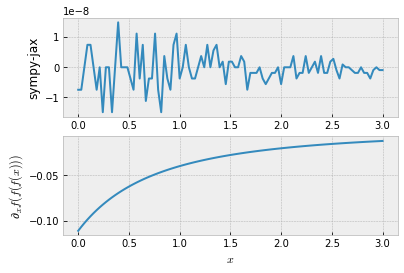

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

fig=plt.figure()
ax=fig.add_subplot(212)
plt.plot(xarr,harr)
#plt.plot(xarr,h_sp(xarr))
plt.xlabel("$x$")
plt.ylabel("$\partial_x f(f(f(x)))$")
ax=fig.add_subplot(211)
plt.plot(xarr,h_sp(xarr)-harr)
plt.ylabel("sympy-jax")
plt.savefig("scan.pdf")
#plt.yscale("log")